In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

(<matplotlib.image.AxesImage at 0x7f0624ecf710>, Text(0.5, 1.0, 'picture'))

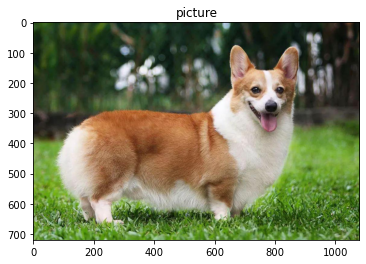

In [2]:
img = plt.imread('./keji.jpeg')
plt.imshow(img),plt.title('picture')

(<matplotlib.image.AxesImage at 0x7f05eef91ed0>, Text(0.5, 1.0, 'original'))

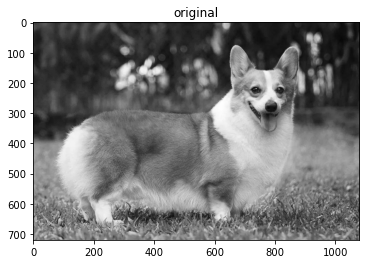

In [3]:
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
plt.imshow(img,'gray'),plt.title('original')

In [98]:
#傅里叶变换
def my_dft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift
#傅里叶逆变换
# 进行逆变换的矩阵需要由复数系统实现
def my_idft(fshift):
    ishift = np.fft.ifftshift(fshift)
    iimg = np.fft.ifft2(ishift)
    iimg = np.abs(iimg)
    return iimg
# 频率域的滤波滤掉的依然是指定频率的信号分量
# 只不过，应该理解为对指定的频率进行指定方式的衰减
# 而不是按照下面两个滤波器做的按照幅值大小进行滤波
# def high_pass(an_array,D0):
#     len_row=len(an_array)
#     len_col=len(an_array[0])
# #     abs_an_array= np.log(np.abs(an_array))
#     abs_an_array=np.abs(an_array)
#     target=an_array
#     for row in range(len_row):
#         for column in range(len_col):
# #             print(abs_an_array[ row][column])
#             if abs_an_array[ row][column] <D0:
#                 target[ row][column]=0
#     return target

# def low_pass(an_array,D0):
#     len_row=len(an_array)
#     len_col=len(an_array[0])
#     abs_an_array=np.abs(an_array)
#     target=an_array
#     for row in range(len_row):
#         for column in range(len_col):
#             if abs_an_array[ row][column] >D0:
#                 target[ row][column]=0
#     return target

In [107]:
# def high_pass(an_array,D0):
#     len_row=len(an_array)
#     len_col=len(an_array[0])
# #     abs_an_array= np.log(np.abs(an_array))
#     abs_an_array=np.abs(an_array)
#     target=an_array
#     for row in range(len_row):
#         for column in range(len_col):
# #             print(abs_an_array[ row][column])
#             if abs_an_array[ row][column] <D0:
#                 target[ row][column]=0
#     return target

# def low_pass(an_array,D0):
#     len_row=len(an_array)
#     len_col=len(an_array[0])
#     abs_an_array=np.abs(an_array)
#     target=an_array
#     for row in range(len_row):
#         for column in range(len_col):
#             if abs_an_array[ row][column] >D0:
#                 target[ row][column]=0
#     return target

def gaussian_low_pass(an_array,D0):
    len_row=len(an_array)
    len_col=len(an_array[0])
    target=an_array
    D1=(len_row/2)*(len_row/2)+(len_col/2)*(len_col/2)
    for row in range(len_row):
        for column in range(len_col):
            dis=(row-len_row/2)*(row-len_row/2)+(column-len_col/2)*(column-len_col/2)
            target[ row][column]=math.exp(-dis/D0)*target[ row][column]
    return target

def gaussian_high_pass(an_array,D0):
    len_row=len(an_array)
    len_col=len(an_array[0])
    target=an_array
    D1=(len_row/2)*(len_row/2)+(len_col/2)*(len_col/2)
    for row in range(len_row):
        for column in range(len_col):
            dis=(row-len_row/2)*(row-len_row/2)+(column-len_col/2)*(column-len_col/2)
            target[ row][column]=(1-math.exp(-dis/D0))*target[ row][column]
    return target

In [74]:
def my_plot(img,name):
    plt.imshow(img, 'gray'), plt.title('D0='+str(name))

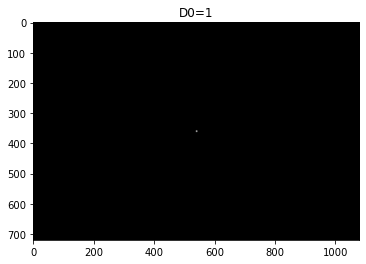

In [112]:
fshift = my_dft(img)
D0=1
gussian_low=gaussian_low_pass(fshift,D0)
my_plot(np.log(1+np.abs(gussian_low)),D0)

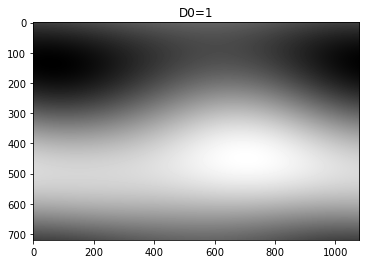

In [113]:
iimg=my_idft(gussian_low)
my_plot(iimg,D0)

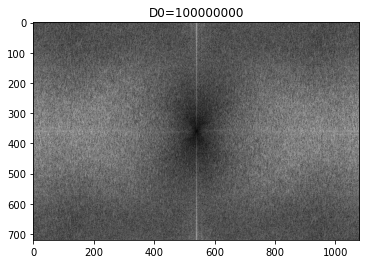

In [130]:
fshift = my_dft(img)
D0=100000000
gussian_high=gaussian_high_pass(fshift,D0)
my_plot(np.log(1+np.abs(gussian_high)),D0)

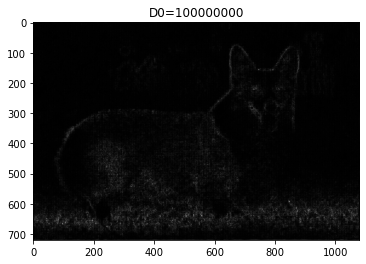

In [131]:
iimg=my_idft(gussian_high)
my_plot(iimg,D0)

(<matplotlib.image.AxesImage at 0x7f81d5888050>,
 Text(0.5, 1.0, 'High pass Image'))

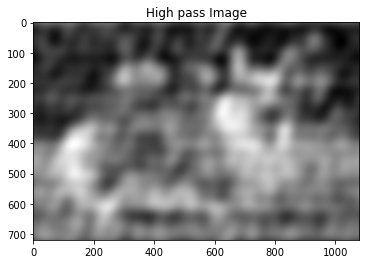

In [17]:
res = np.log(np.abs(fshift))
my_plot(res,'shift Fourier Image')

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

NameError: name 'res' is not defined

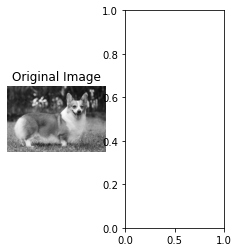

In [13]:
#展示结果

plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Original Image')

plt.axis('off')

plt.subplot(132), plt.imshow(res, 'gray'), plt.title('Fourier Image')

plt.axis('off')

plt.subplot(133), plt.imshow(iimg, 'gray'), plt.title('Inverse Fourier Image')

plt.axis('off')

plt.show()

In [ ]:
# 频谱上亮的点代表频谱幅值比较大而已。实际上，往往是低频部分比较亮，因为低频占了图像的绝大部分能量

# 高频的是轮廓，低频的是细节
# 可以很清楚的看到，高通滤波器的频率越高，衰减的越慢，此时轮廓只能慢慢的看到柯基本身的部分轮廓，所以依然是高频代表轮廓
#而低频，在轮廓被过滤掉之后，细节也比较模糊，但是随着衰减的低频变高，将会出现更加清楚的细节